In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
dim_match_summary = pd.read_csv('/content/drive/MyDrive/Internships/MentorNess/Task 3 IPL Analysis/dim_match_summary.csv')
dim_match_summary.shape

(206, 6)

In [4]:
dim_players = pd.read_csv('/content/drive/MyDrive/Internships/MentorNess/Task 3 IPL Analysis/dim_players.csv')
dim_players.shape

(292, 5)

In [5]:
dim_players.shape

(292, 5)

In [6]:
dim_players.rename(columns={'team':'winner'},inplace=True)
dim_players.head()

,name,winner,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [7]:
fact_bating_summary = pd.read_csv('/content/drive/MyDrive/Internships/MentorNess/Task 3 IPL Analysis/fact_bating_summary.csv')
fact_bating_summary.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [8]:
fact_bowling_summary = pd.read_csv('/content/drive/MyDrive/Internships/MentorNess/Task 3 IPL Analysis/fact_bowling_summary.csv')
fact_bowling_summary.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [9]:
fact_bowling_summary.rename(columns={
    'runs':'bowl_run',
    '0s':'bowl_0s',
    '4s':'bowl_4s',
    '6s':'bowl_6s'
},inplace=True)
fact_bating_summary.rename(columns={
    'runs':'bat_run',
    '4s':'bat_4s',
    '6s':'bat_6s'
},inplace=True)

In [10]:
fact_bating_summary.duplicated().sum()
fact_bating_summary.drop_duplicates(inplace=True)
fact_bowling_summary.drop_duplicates(inplace=True)
result = pd.concat([fact_bating_summary, fact_bowling_summary], axis=1, join="inner")
result.shape

(2436, 25)

In [11]:
duplicate_cols = result.columns[result.columns.duplicated()]
result.drop(columns=duplicate_cols, inplace=True)
result.shape

(2436, 21)

In [12]:
result.head()

,teamInnings,battingPos,batsmanName,out/not_out,bat_run,balls,bat_4s,bat_6s,SR,bowlingTeam,bowlerName,overs,maiden,bowl_run,wickets,economy,bowl_0s,bowl_4s,bowl_6s,wides,noBalls
0,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,KKR,1,ShubmanGill,out,51,43,6,0,118.60,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [13]:
result = dim_match_summary.merge(dim_players, on='winner')
result.shape

(5980, 10)

In [14]:
result.columns

Index(['team1', 'team2', 'winner', 'margin', 'matchDate', 'match_id', 'name',
       'battingStyle', 'bowlingStyle', 'playingRole'],
      dtype='object')

In [15]:
fact_bowling_summary.columns

Index(['match_id', 'match', 'bowlingTeam', 'bowlerName', 'overs', 'maiden',
       'bowl_run', 'wickets', 'economy', 'bowl_0s', 'bowl_4s', 'bowl_6s',
       'wides', 'noBalls'],
      dtype='object')

In [16]:
result = result.merge(fact_bating_summary, on='match_id')
result.shape

(94834, 20)

In [17]:
result = result.merge(fact_bowling_summary, on='match_id')
result.shape

(1121097, 33)

In [18]:
result.head()

,team1,team2,winner,margin,matchDate,match_id,name,battingStyle,bowlingStyle,playingRole,match_x,teamInnings,battingPos,batsmanName,out/not_out,bat_run,balls,bat_4s,bat_6s,SR,match_y,bowlingTeam,bowlerName,overs,maiden,bowl_run,wickets,economy,bowl_0s,bowl_4s,bowl_6s,wides,noBalls
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,RuturajGaikwad,Right hand Bat,Right arm Offbreak,Batter,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,RuturajGaikwad,Right hand Bat,Right arm Offbreak,Batter,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,RuturajGaikwad,Right hand Bat,Right arm Offbreak,Batter,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,RuturajGaikwad,Right hand Bat,Right arm Offbreak,Batter,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,RuturajGaikwad,Right hand Bat,Right arm Offbreak,Batter,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


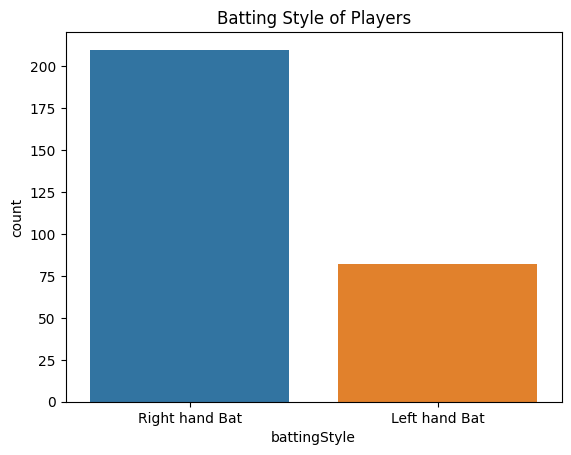

In [19]:
sns.countplot(x=dim_players['battingStyle'],hue=dim_players['battingStyle'])
plt.title('Batting Style of Players')
plt.show()

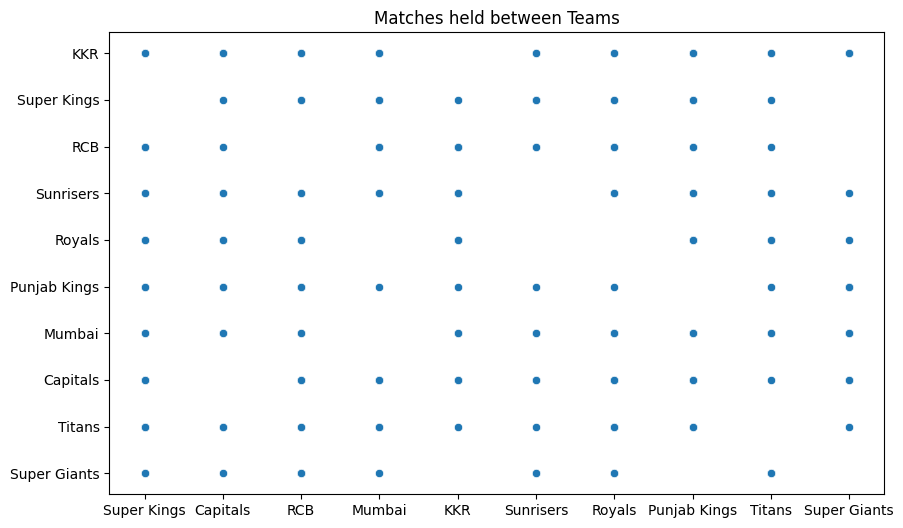

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=dim_match_summary['team1'],y=dim_match_summary['team2'], hue=[])
plt.title('Matches held between Teams')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

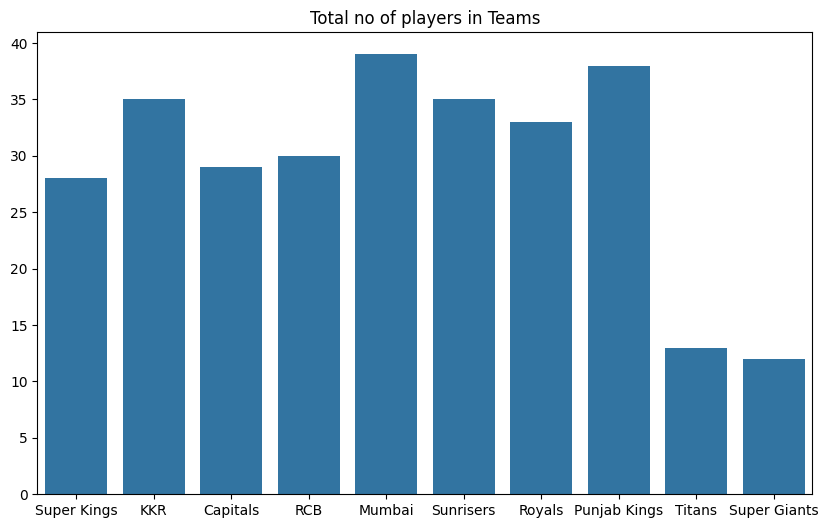

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x=dim_players['winner'])
plt.title('Total no of players in Teams')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

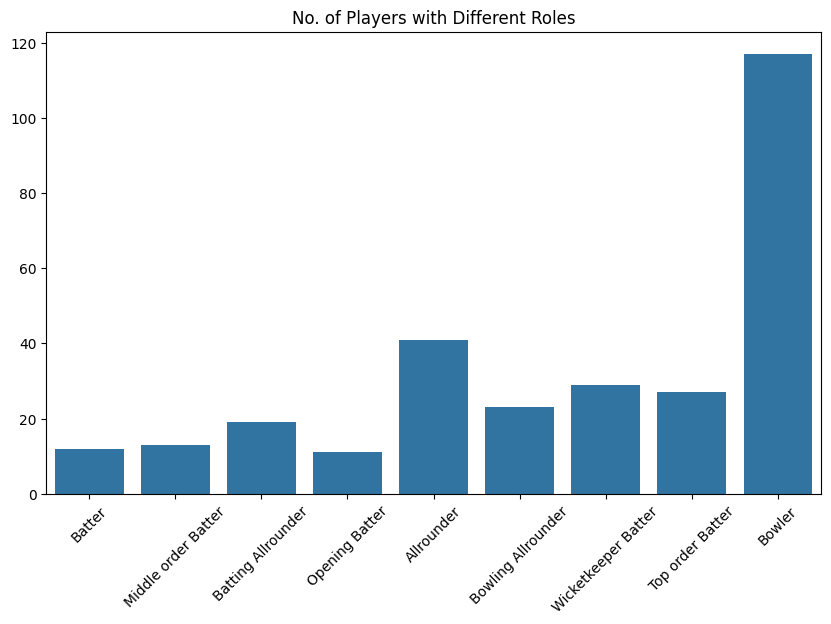

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x=dim_players['playingRole'])
plt.xticks(rotation=45)
plt.title('No. of Players with Different Roles')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

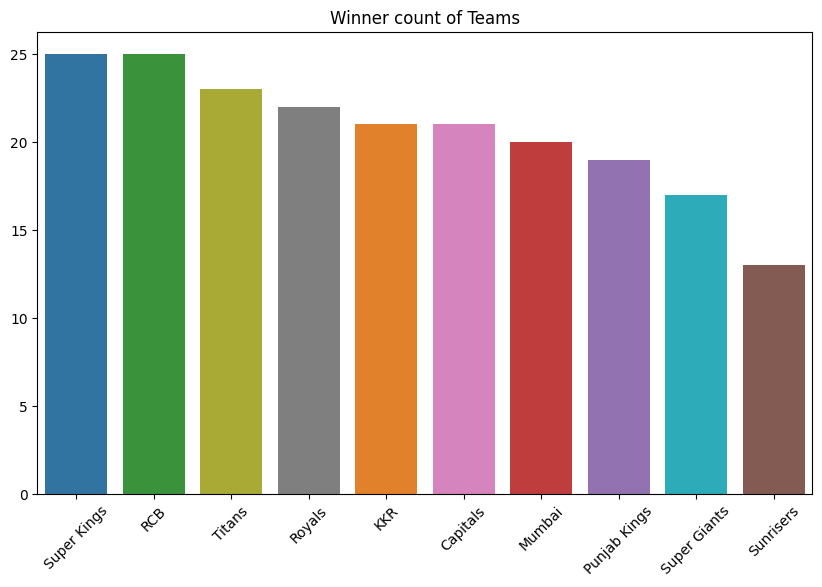

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x=dim_match_summary['winner'], hue=dim_match_summary['winner'], order=dim_match_summary['winner'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Winner count of Teams')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

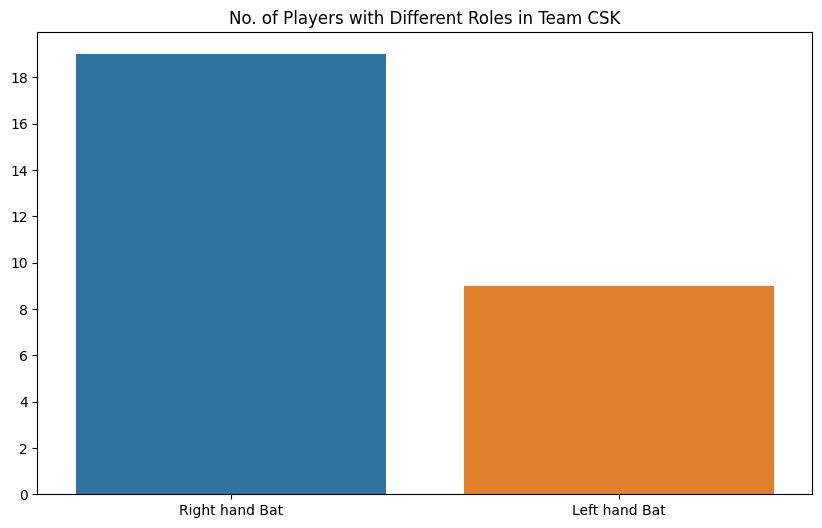

In [24]:
csk = dim_players[dim_players['winner']== 'Super Kings']
plt.figure(figsize=(10,6))
sns.countplot(x=csk['battingStyle'], hue=csk['battingStyle'])
plt.yticks(np.arange(0, 20, 2))
plt.title('No. of Players with Different Roles in Team CSK')
plt.xlabel(None)
plt.ylabel(None)
plt.show()


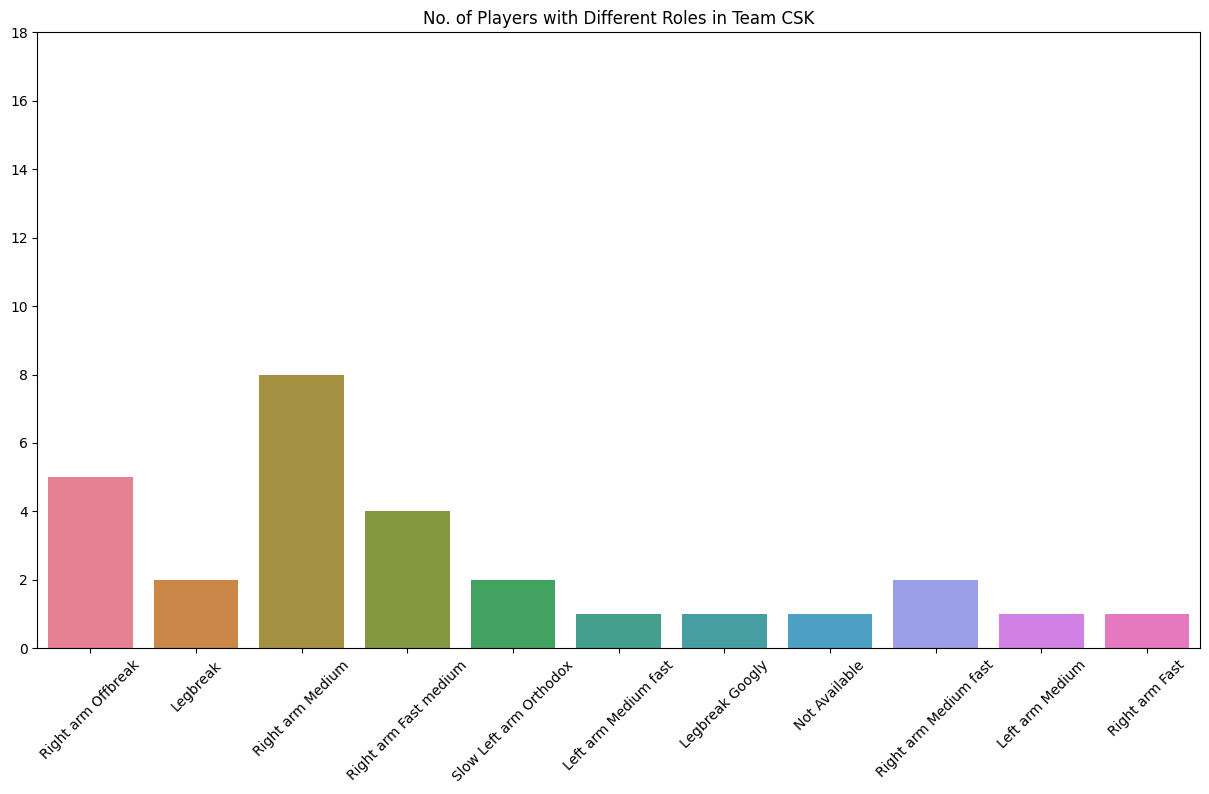

In [25]:
plt.figure(figsize=(15,8))
csk = dim_players[dim_players['winner']== 'Super Kings']
sns.countplot(x=csk['bowlingStyle'], hue=csk['bowlingStyle'])
plt.yticks(np.arange(0, 20, 2))
plt.xticks(rotation=45)
plt.title('No. of Players with Different Roles in Team CSK')
plt.xlabel(None)
plt.ylabel(None)
plt.show()


In [26]:
info = fact_bowling_summary.groupby(['bowlingTeam','bowlerName'])['wickets'].sum().sort_values(ascending=False)
info

,,wickets
bowlingTeam,bowlerName,
RCB,HarshalPatel,65
Titans,MohammedShami,48
Royals,YuzvendraChahal,48
Titans,RashidKhan,46
Punjab Kings,ArshdeepSingh,45
KKR,VarunChakravarthy,44
RCB,MohammedSiraj,39
Super Kings,RavindraJadeja,37
Mumbai,JaspritBumrah,36
